# Introduction to Topic Modeling

Topic modeling is a technique used to discover the collections of words that frequently occur together within a collection of documents. A topic modeling algorithm identifies the words that belong to each topic and the topics that belong to each document:

<img src='/files/images/topic-modeling-intuition.png'>

Each word has a certain proportion in each topic, and each topic has a certain proportion in each document. The goal of the topic modeling algorithm is to infer these proportions.

## Topic Modeling Methods

There are two popular techniques for building topic models: Non-Negative Matrix Factorization, and Latent Dirichlet Allocation.

### NMF

[Non-Negative Matrix Factorization](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) is a dimension reduction technique that factors an input matrix of shape *m* x *n* into a matrix of shape *m* x *k* and another matrix of shape *n* x *k*.

In text mining, one can use NMF to build [topic models](https://en.wikipedia.org/wiki/Topic_model). To do so, one first builds a [Term-Document Matrix](https://en.wikipedia.org/wiki/Document-term_matrix), or matrix in which each row represents a term, each column represents a document, and each cell value represents the number of times the given term occurs in the given document:

<img src='/files/images/tdm.png' style='width:350px; margin: 0 auto;'/>

After building this matrix, one can use NMF to "factor" the matrix into two smaller matrices. Those two matrices, when multiplied, should approximate as greatly as possible the original Term Document Matrix:

<img src='/files/images/matrix-factorization-intuition.jpg' style='width:550px; margin: 0 auto' />
 
  *n* = Terms  
  *v* = Documents  
  *k* = Topics  

In other words, the *n* x *v* matrix represents the Term Document Matrix, the *n* x *k* matrix represents a Term by Topic matrix, and the *k* x *v* matrix represents the Topic by Document matrix.

The Term by Topic matrix represents the distribution of each term over each topic, and the Topic by Document matrix represents the distribution of each topic over each document.

### LDA

Latent Dirichlet Allocation is a generative statistical technique that attempts to model each document in an input corpus as a combination of a fixed number of topics. In LDA, each document is modeled as a probability distribution over a fixed number of topics, and each topic is modeled as a probability distribution over the linguistic types (or unique words) contained within the input corpus.

In other words, each term has a certain frequency in each topic, and each topic has a certain frequency in each document. These frequencies are learned through a fairly statistical technique known as Bayesian inference [[mathematics outlined here](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation#Definition)].

### Comparing NMF and LDA

There has been some experimental research to evaluate the coherence of topics generated by NMF and LDA. [O'Callaghan 2015](https://raw.githubusercontent.com/YaleDHLab/lab-workshops/master/topic-modeling-python/lda-nmf-topic-coherence.pdf) found the following results for one topical coherence measure:

<img src='/files/images/nmf-vs-lda.png'>

While other measures produce different results, generally NMF and LDA perform quite similarly.

## Getting Started with NMF

Because the math behind NMF is much more intuitive than LDA, we'll use NMF in our session. To do so, we'll use the `nmf` package to build our topic models. You can install this package and all other packages we'll use in this session with the following commands:

```
git clone https://github.com/yaledhlab/lab-workshops
cd lab-workshops/topic-modeling-python
pip install -r requirements.txt
jupyter notebook model-topics.ipynb
```

Once that completes, you can verify the package is installed by running `pip freeze`, which displays the versions of each Python package you've installed. You should see each of the packages outlined in `requirements.txt`

#### Acquiring Sample Data

To build topic models, we'll need some text files. For the purpuses of the workshop, let's download this collection of [sample scientific papers](https://s3.amazonaws.com/duhaime/github/nmf/texts.tar.gz) from the Philosophical Transactions, the first professional scientific journal:

<img src='/files/images/philosophical-transactions-cover.jpg' style='width:200px; margin: 0 auto' />

To download those files from the command line on Unix, you can run (you may need to `brew install wget`):
```
wget https://s3.amazonaws.com/duhaime/github/nmf/texts.tar.gz
```

Once you've downloaded those files, if you're on OSX or Linux, you can unzip them by running:

```
tar -zxf texts.tar.gz
```

If you're on Windows, you can download and use 7-zip to unzip the archive.

Once you've installed nmf and downloaded the sample documents, we're ready to begin!

In [2]:
from nmf import NMF

# `files` specifies the directory with text documents
# `topics` indicates the number of topics in the model
model = NMF(files='texts', topics=20)

'''
The following attributes are queryable on `model`:
  topics_to_words: {dict} maps each topic to its top terms
  docs_to_topics: {dict} maps each document to each topic's presence in the document
  documents_by_topics: {numpy.ndarray} - contains one row per document and one columm per topic
  topics_by_terms: {numpy.ndarray} - contains one row per topic and one column per term
'''

# e.g. Fetch the topics_to_words attribute
model.topics_to_words

defaultdict(list,
            {0: ['particles',
              'salt',
              'glass',
              'small',
              'salts',
              'water',
              'coagulated',
              'said',
              'sand',
              'silver'],
             1: ['ad',
              'ut',
              'est',
              'non',
              'quod',
              'cum',
              'vel',
              'quae',
              'si',
              'ex'],
             2: ['10', '11', '00', '12', '30', '20', '15', '16', '21', '13'],
             3: ['book',
              'books',
              'author',
              'printing',
              'printed',
              'manuscripts',
              'ancient',
              'library',
              'account',
              'language'],
             4: ['read',
              'line',
              'pag',
              'paul',
              'printers',
              'smith',
              'arms',
              'printed',
           

### Visualizing Term Vectors

As we noted above, NMF breaks a Term-Document Matrix into two matrices:
  `model.topics_by_terms`, which has shape (topics x terms), and
  `model.documents_by_topics`, which has shape (documents x topics)
  
Because the former matrix visualizes each term as a distribution over terms, we can treat each row of that matrix as a "word embedding", or vector representation of a word's semantic significance. Let's try to visualize what those word embeddings look like. 

Each column of `model.topics_by_terms` has n rows, where n = the number of topics we specified in the NMF() constructor. In what follows, we'll use the [TSNE dimension reduction algorithm](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) to reduce each term vector down to three dimensions, then we'll visualize the three dimensional embeddings of each term.

In this scatterplot, each term is positioned near terms with similar semantic content.

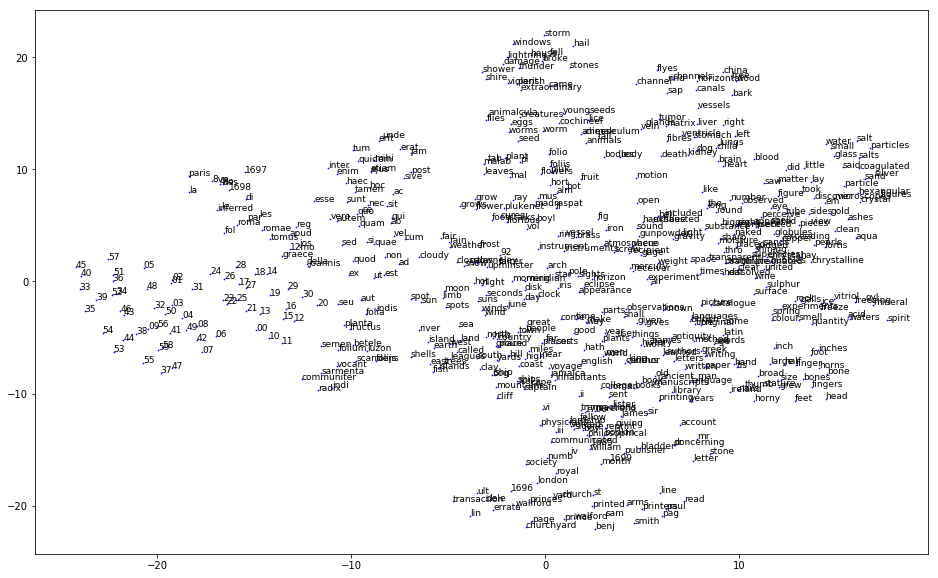

In [3]:
%matplotlib inline

from sklearn.manifold import TSNE
from umap import UMAP
import matplotlib.pyplot as plt
import numpy as np

# supress output generated by numpy during computation
np.set_printoptions(suppress=True)

def scatterplot(points, labels):
  '''
  Create a 2d scatterplot from points with labels
  @args:
    [arr] points: contains one member with ordered x,y,z vals for each point
    [str] labels: contains one string label for each member of `points`
  @returns:
    None
  '''
  fig, ax = plt.subplots(figsize=(16,10))
  
  # add each point and label to the plot
  for idx, _ in enumerate(points):
    x, y = points[idx]
    label = labels[idx]
    ax.scatter(x, y, s=0.5, color='b')
    ax.text(x, y, label, size=9, color='k')
  plt.show()

def get_model(method='umap'):
  '''
  Return a model that can project points into 2D
  @args:
    {str} method: the dimension reduction method to use
  @returns:
    a model that supports a `.fit_transform()` method
  '''
  if method == 'tsne':
    return TSNE(n_components=2, random_state=0)
  elif method == 'umap':
    return UMAP(n_neighbors=5, min_dist=2)
  else:
    raise Exception('The requested model type could not be found!')
  
##
# Build TSNE Model of Terms
##

# topics_by_terms.T has shape (n_terms, n_topics). Find the terms in that matrix
# that have 0.1 or greater concentration in a given topic
concentrated = np.amax(model.topics_by_terms.T, axis=1) >= 0.1
indices = [c for c, i in enumerate(concentrated) if i == True]

# get the labels for the selected terms
labels = [model.feature_names[i] for i in indices]

# get the selected term vectors
term_vectors = model.topics_by_terms.T[indices]

# build a UMAP or TSNE model of the selected terms
projection_model = get_model(method='umap')

# fit the model
fit_model = projection_model.fit_transform( term_vectors )

# draw the scatterplot
scatterplot(fit_model, labels)

### Hierarchical Document Similarity

`model.documents_by_topics` contains one row for each document and one column for each topic. Using this data we can fairly easily construct a hierarchical visualization of the similarity between the documents in the model (or topics in the model).

In this hierarchical visualization, documents with more similar content appear close together, which less closely related documents appear more distant from one another.

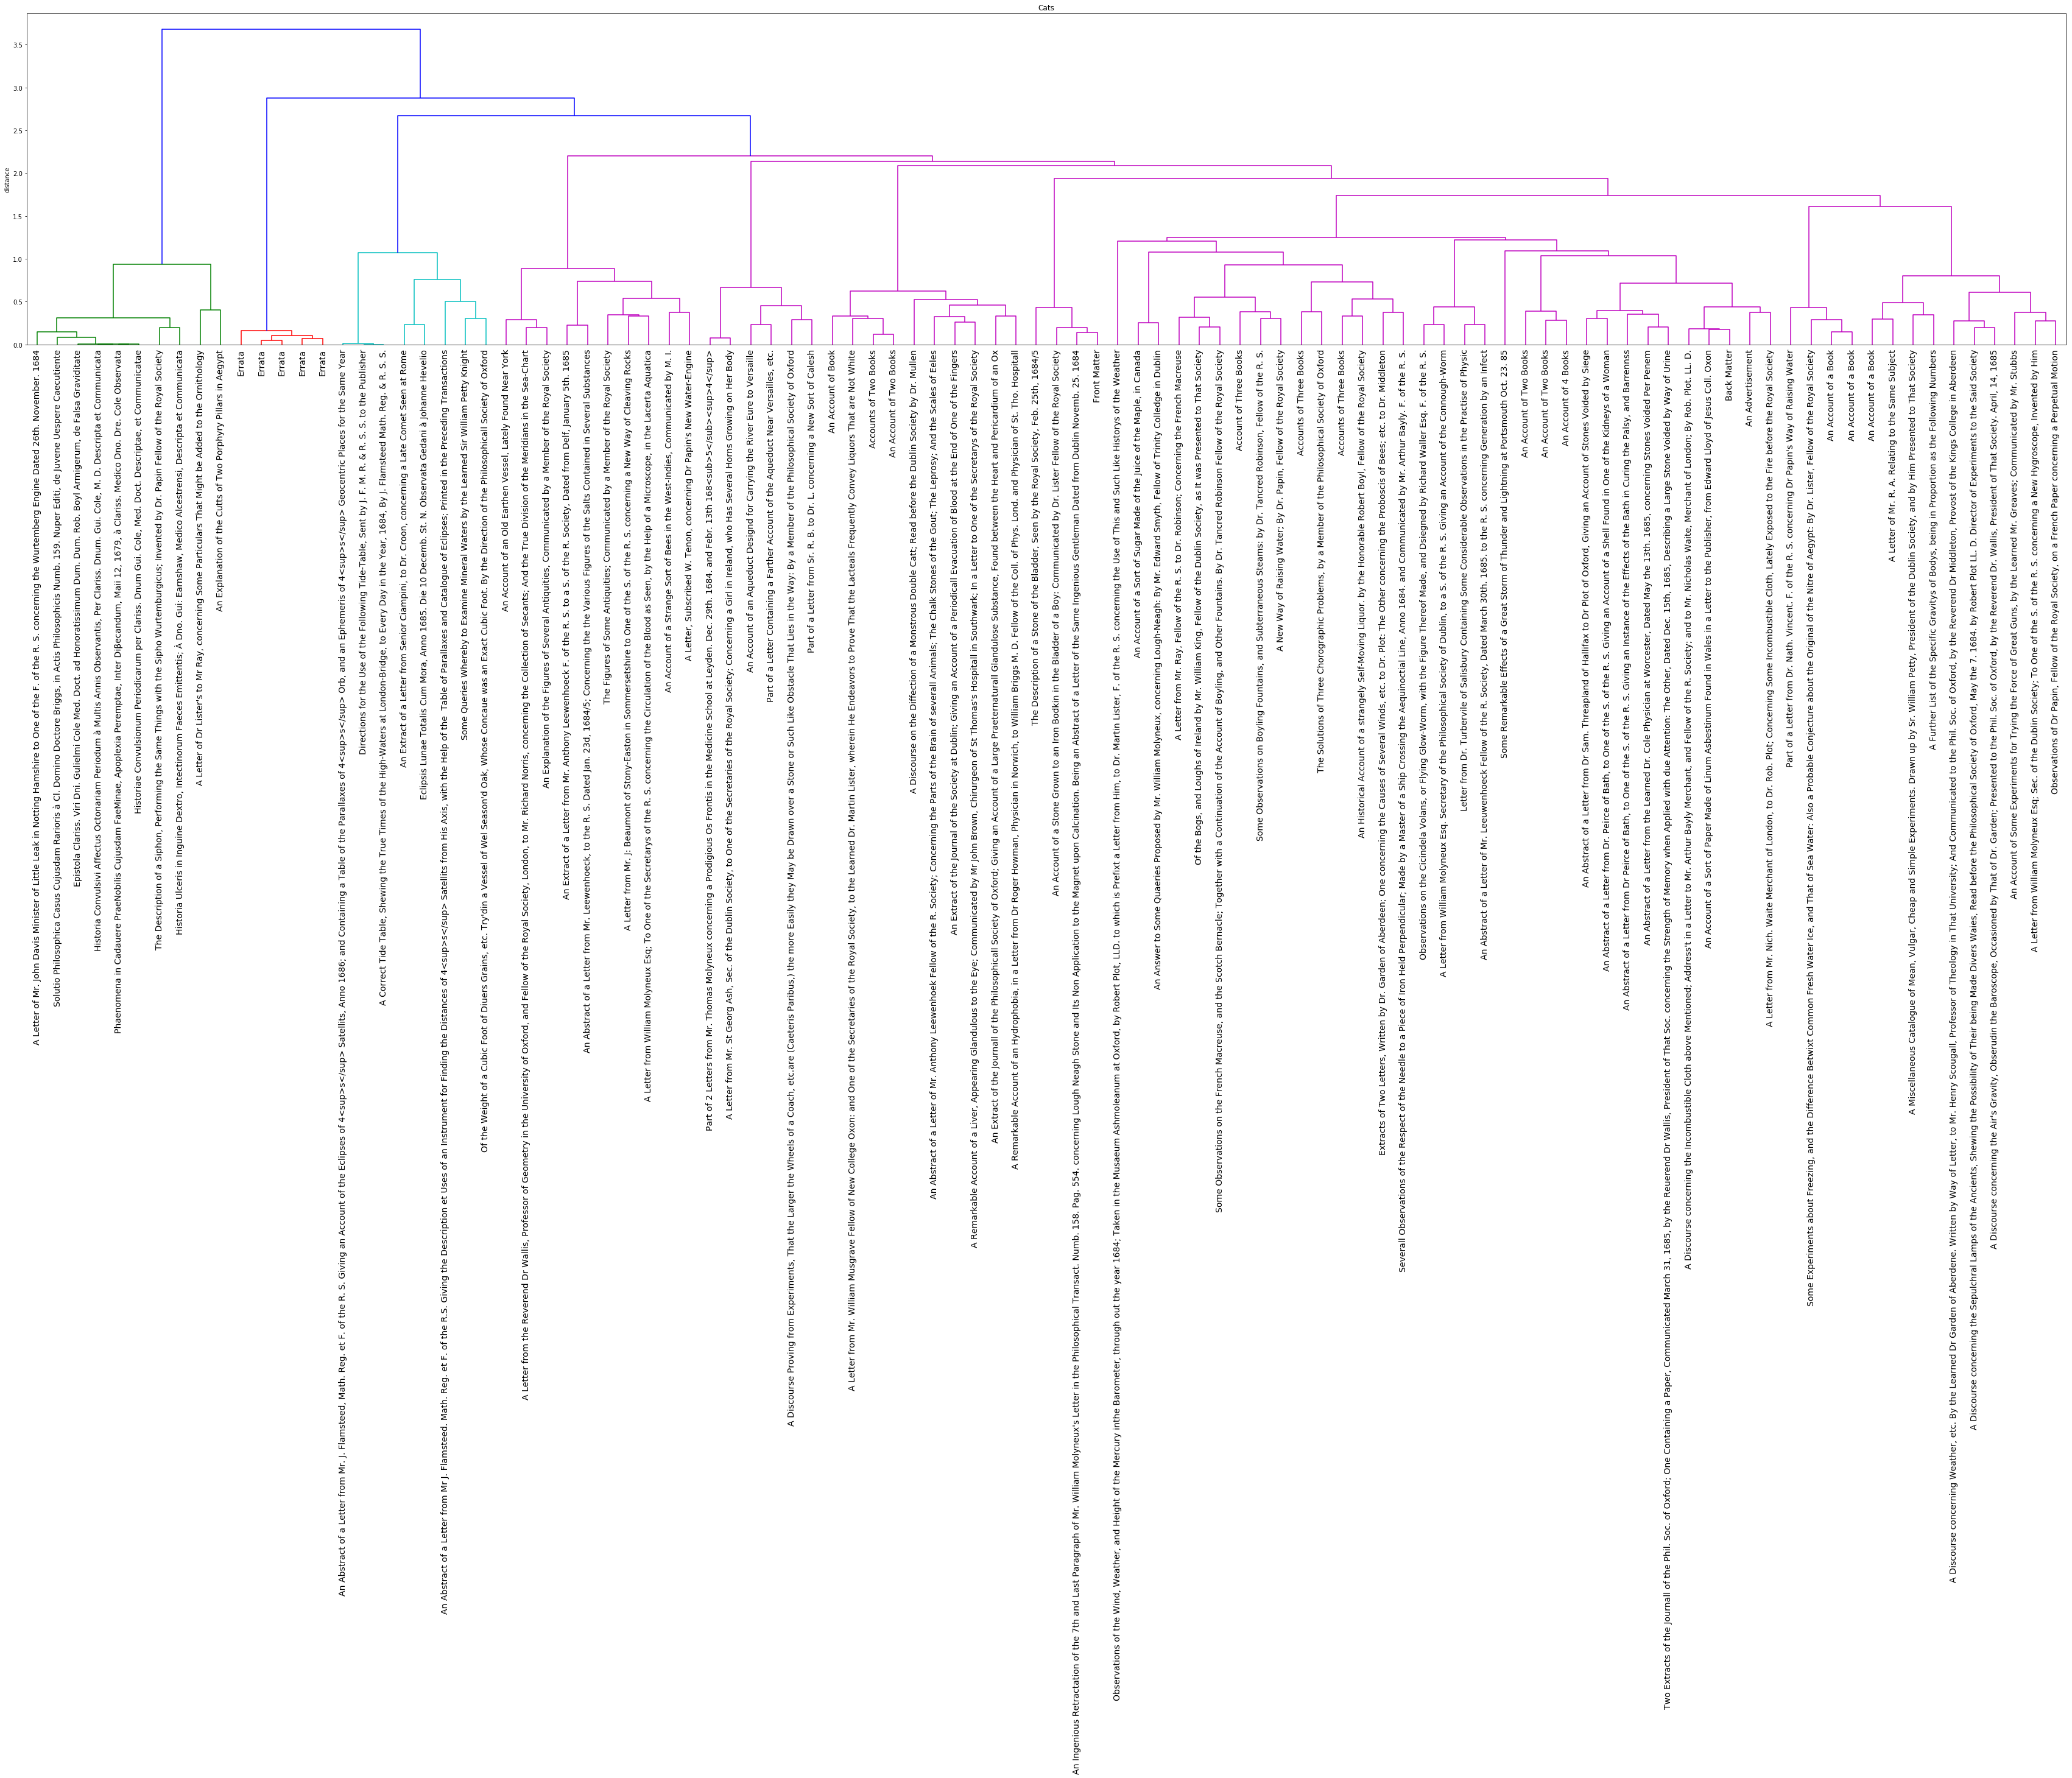

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
from os.path import basename
import json

# visualize the first 100 documents
X = model.documents_by_topics[:100]
X = np.nan_to_num(X)
Z = linkage(X, 'ward')

# build a list of labels using the first 100 filenames
metadata = json.load(open('metadata.json'))
filenames = [basename(i) for i in model.infiles]
labels = [metadata[i]['title'] for i in filenames[:100]]

plt.figure(figsize=(60, 10))
plt.title('Hierarchical Document Similarity')
plt.ylabel('distance')

# leaf_rotation rotates the x axis label
dendrogram(Z, leaf_rotation=90.0, leaf_font_size=14.0, labels=labels)
plt.show()

### Topics over Time

When working with topic models, it's often helpful to visualize the distribution of the topics over time. To do so, one of course needs some time-based metadata, which we happen to have available for our sample corpus.

The visualization below displays the mean presence of each topic in each decade.

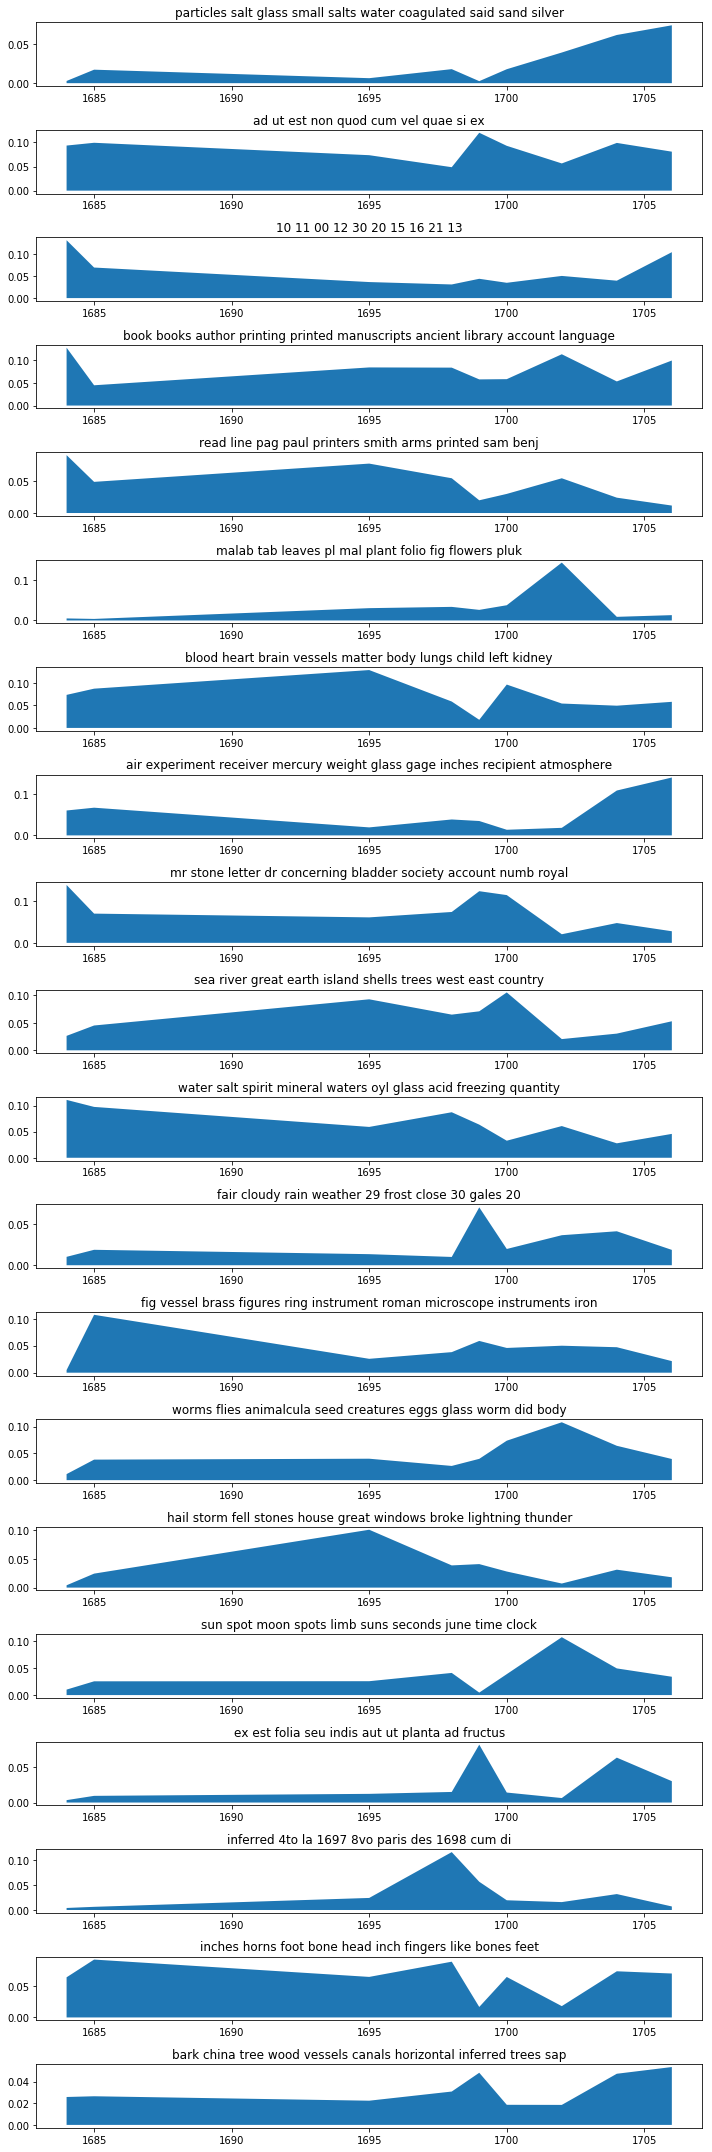

In [34]:
from __future__ import division
from collections import defaultdict

# use a defaultdict to store the presence of each topic over time
# structure: d[topic][year] = [freq, freq, freq]
topic_year_freqs = defaultdict(lambda: defaultdict(list))

# pluck out the filename 
for i in model.docs_to_topics:
  filename = basename(i)
  year = int(metadata[filename]['year'])
  for topic_idx in model.docs_to_topics[i]:
    topic_freq = model.docs_to_topics[i][topic_idx]
    topic_year_freqs[topic_idx][year].append(topic_freq)
    
# find the mean presence of each topic in each year
for topic in topic_year_freqs:
  for year in topic_year_freqs[topic]:
    n_observations = len(topic_year_freqs[topic][year])
    freq_sum = sum(topic_year_freqs[topic][year])
    topic_year_freqs[topic][year] = freq_sum / n_observations
    
# create one subplot for each topic
f, axes = plt.subplots(len(topic_year_freqs.keys()), 1)
f.set_figheight(30)
f.set_figwidth(10)
for c, i in enumerate(topic_year_freqs):
  years = sorted(topic_year_freqs[i].keys())
  vals = [topic_year_freqs[i][year] for year in years]
  label = ' '.join(model.topics_to_words[i])
  axes[c].stackplot(years, vals)
  axes[c].set_title(label)
plt.tight_layout()

## Going Further with Topic Modeling

We've now covered the basics of working with topic models to answer some basic questions of a text corpus. For those looking to go further with topic modeling, there are a few resources that may be of interest.

### Building Topic Models on the GPU

If your research lab has access to a server with graphical processing unit chips, you can leverage GPU-based implementations of topic modeling to greatly expedite the process of building topic models.

If you have access to a discrete GPU chip, you may wish to consider the Functional Bioinformatics Group's [GPU-based implementation of NMF](https://github.com/bioinfo-cnb/bionmf-gpu).

### Distributed Topic Models

In the work we did above, we assumed the original Term Document Matrix would fit in RAM concurrently. When working with huge text collections, this is not always feasible. One popular technique for building extremely large topic models is to use a multi-host implementation in which each host machine only works on a subset of the input data. If this is your situation, you may wish to consider the [LDA implementation in Spark](https://spark.apache.org/docs/2.2.0/ml-clustering.html#latent-dirichlet-allocation-lda), a popular map-reduce style process manager often used for very large compute operations.

### Experimenting with LDA

We've focused on using Non-Negative Matrix Factorization in this session, but Latent Dirichlet Allocation is often used to generate topic models. To try building topic models using LDA, feel free to [build sample LDA topics here](http://yaledhlab.github.io/lab-workshops/topic-modeling-python/). This interface uses JavaScript to build and display topic models:

<img src='/files/images/js-lda.png' style='width:400px; margin: 0 auto;'>

If you inspect the [JavaScript file that powers this interface](http://yaledhlab.github.io/lab-workshops/topic-modeling-python/jslda.js), you'll see that the topic weight estimation all happens inside the `sweep()` function, which is less than 100 lines of code.